In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [ ]:
import yfinance as yf

start = '2010-01-01'
end = '2023-12-01'

# Use yfinance to fetch data
df = yf.download('AAPL', start=start, end=end)

# Display the DataFrame
print(df.head())


[*********************100%%**********************]  1 of 1 completed
                Open      High       Low     Close  Adj Close     Volume
Date                                                                    
2010-01-04  7.622500  7.660714  7.585000  7.643214   6.487534  493729600
2010-01-05  7.664286  7.699643  7.616071  7.656429   6.498750  601904800
2010-01-06  7.656429  7.686786  7.526786  7.534643   6.395379  552160000
2010-01-07  7.562500  7.571429  7.466071  7.520714   6.383555  477131200
2010-01-08  7.510714  7.571429  7.466429  7.570714   6.425996  447610800


In [ ]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-11-02,175.520004,177.779999,175.460007,177.570007,177.570007,77334800
2023-11-03,174.240005,176.820007,173.350006,176.649994,176.649994,79763700
2023-11-06,176.380005,179.429993,176.210007,179.229996,179.229996,63841300
2023-11-07,179.179993,182.440002,178.970001,181.820007,181.820007,70530000
2023-11-08,182.350006,183.449997,181.589996,182.889999,182.889999,49287300


In [ ]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.487533,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.498751,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.395378,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.383556,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.425996,447610800


In [ ]:
del df['Date']

In [ ]:
df.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


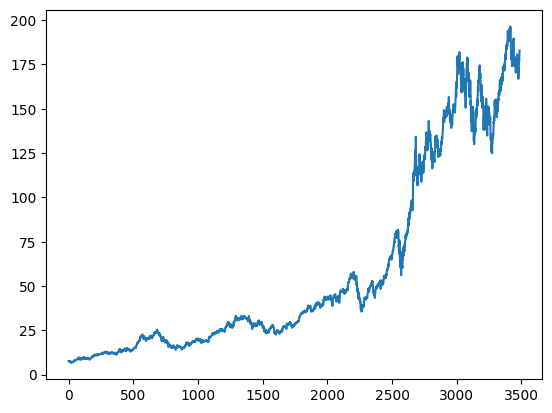

In [ ]:
plt.plot(df.Close)

In [ ]:
ma100 = df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3482    181.744401
3483    181.677801
3484    181.630601
3485    181.588701
3486    181.568401
Name: Close, Length: 3487, dtype: float64

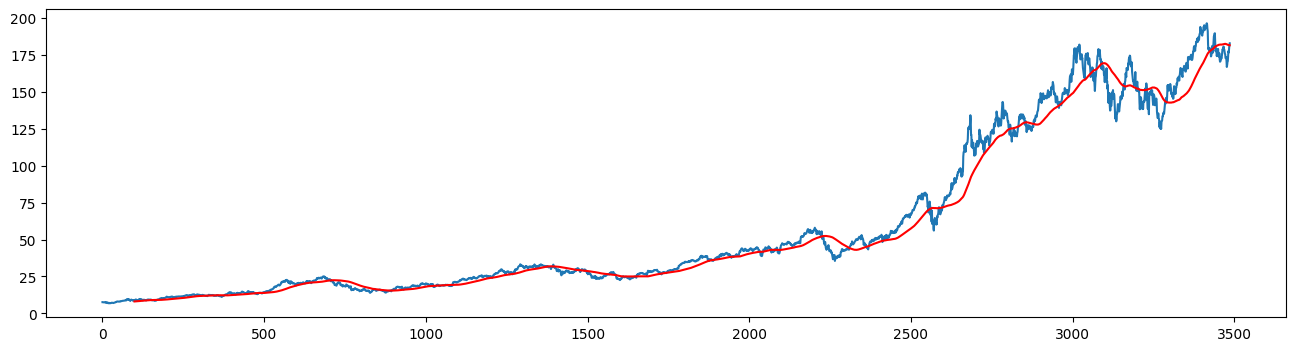

In [ ]:
plt.figure(figsize=(16,4))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [ ]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3482    171.29695
3483    171.50385
3484    171.71065
3485    171.91420
3486    172.11600
Name: Close, Length: 3487, dtype: float64

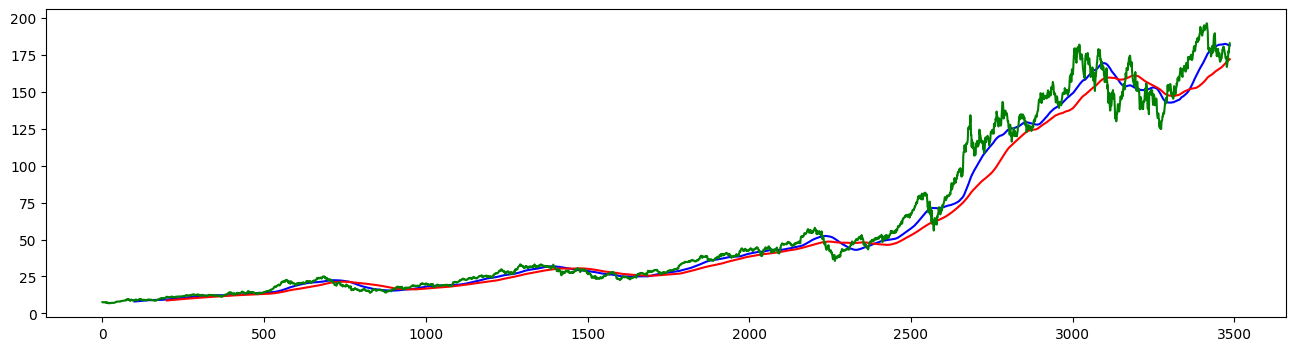

In [ ]:
plt.plot(ma100, 'b')
plt.plot(ma200, 'r')
plt.plot(df.Close, 'g')
# comparing rolling 100 and 200 and original data

In [ ]:
df.shape

(3487, 5)

In [ ]:
#splitting the data into training and testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

# data_training.shape
# because we cant do cross validation

(2440, 1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [ ]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.01533047],
       [0.01558878],
       [0.01320823],
       ...,
       [0.92489035],
       [0.95856017],
       [0.95611678]])

In [ ]:
x_train = []
y_train = []

for i in range(100,data_training_array.shape[0]):
  x_train.append(data_training_array[i-100: i])
  y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train.shape

(2340, 100, 1)

In [ ]:
# ML MODEL

In [ ]:
from keras.layers import Dense, Dropout , LSTM
from keras.models import Sequential

In [ ]:
model = Sequential ()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape [1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.4))

model.add(Dense (units = 1))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_4 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_6 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_5 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_7 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_6 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_8 (LSTM)               (None, 120)              

In [ ]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
74/74 [==============================] - 40s 332ms/step - loss: 0.0017
Epoch 2/50
74/74 [==============================] - 21s 288ms/step - loss: 0.0018
Epoch 3/50
74/74 [==============================] - 20s 273ms/step - loss: 0.0020
Epoch 4/50
74/74 [==============================] - 21s 287ms/step - loss: 0.0018
Epoch 5/50
74/74 [==============================] - 20s 273ms/step - loss: 0.0016
Epoch 6/50
74/74 [==============================] - 19s 262ms/step - loss: 0.0015
Epoch 7/50
74/74 [==============================] - 20s 273ms/step - loss: 0.0016
Epoch 8/50
74/74 [==============================] - 20s 267ms/step - loss: 0.0016
Epoch 9/50
74/74 [==============================] - 20s 265ms/step - loss: 0.0016
Epoch 10/50
74/74 [==============================] - 20s 272ms/step - loss: 0.0017
Epoch 11/50
74/74 [==============================] - 20s 275ms/step - loss: 0.0015
Epoch 12/50
74/74 [==============================] - 21s 277ms/step - loss: 0.0015
Epoch 13/50
7

In [ ]:
model.save ('keras_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
past_100_days = data_training.tail (100)

In [ ]:
final_df = past_100_days.append (data_testing, ignore_index=True)

<ipython-input-53-3d0b1d1afcd8>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append (data_testing, ignore_index=True)


In [ ]:
final_df.head()

,Close
0,51.869999
1,51.790001
2,51.320000
3,51.075001
4,51.152500


In [ ]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.05580407],
       [0.05528164],
       [0.05221224],
       ...,
       [0.88754285],
       [0.90445721],
       [0.91144491]])

In [ ]:
input_data.shape

(1147, 1)

In [ ]:
x_test = []
y_test = []

for i in range(100,input_data.shape[0]):
  x_test.append(input_data[i-100: i])
  y_test.append(input_data[i, 0])

x_test, y_test = np.array(x_test), np.array(y_test)

In [ ]:
x_test.shape

(1047, 100, 1)

In [ ]:
# Making Predictions
y_predicted = model.predict(x_test)
y_predicted.shape

33/33 [==============================] - 4s 106ms/step


(1047, 1)

In [ ]:
y_test

array([0.07420408, 0.07608162, 0.07738775, ..., 0.88754285, 0.90445721,
       0.91144491])

In [ ]:
y_predicted

array([[0.12052274],
       [0.12164727],
       [0.12280346],
       ...,
       [0.8216604 ],
       [0.8363544 ],
       [0.85011435]], dtype=float32)

In [ ]:
scaler.scale_

array([0.00653061])

In [ ]:
scale_factor = 1/0.00653061
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

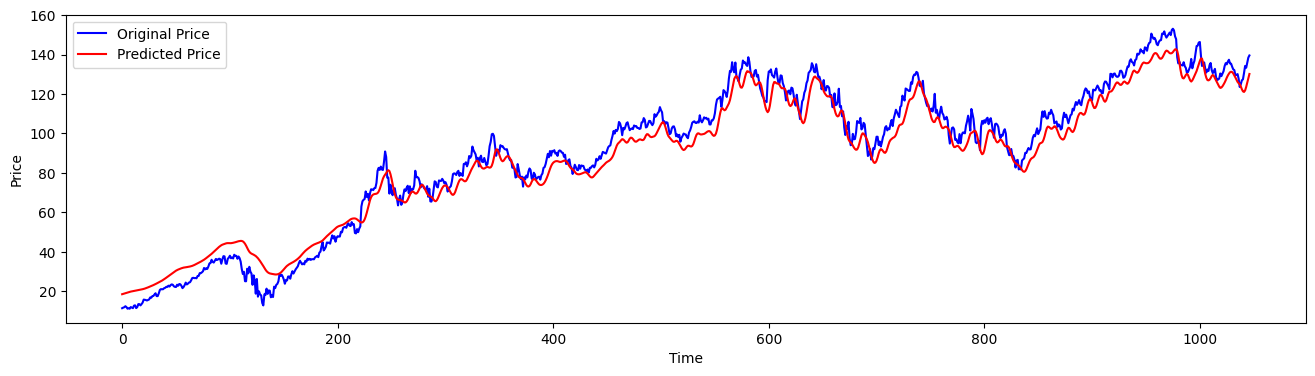

In [ ]:
plt.figure(figsize= (16,4))
plt.plot (y_test, 'b', label = 'Original Price')
plt.plot (y_predicted,'r', label ='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend ()
plt.show()